<a href="https://colab.research.google.com/github/fazatra/PCVK_Genap_2023/blob/master/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# LATIHAN PRAKTIKUM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

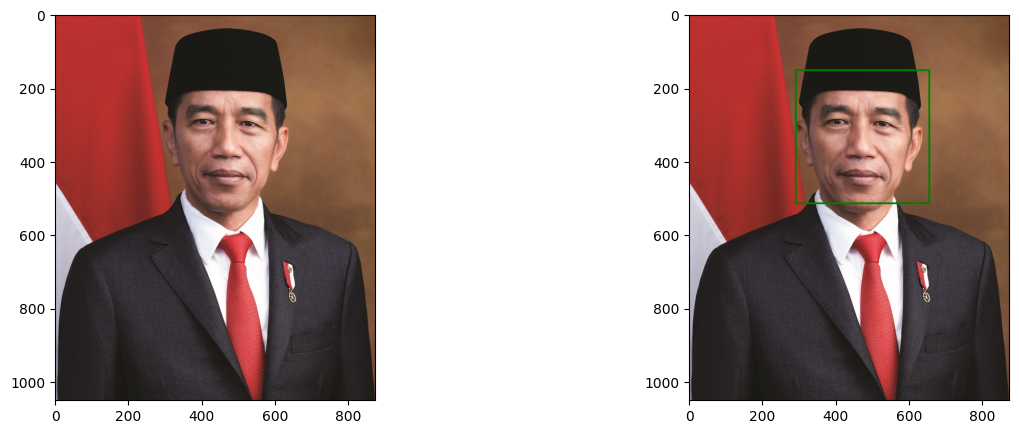

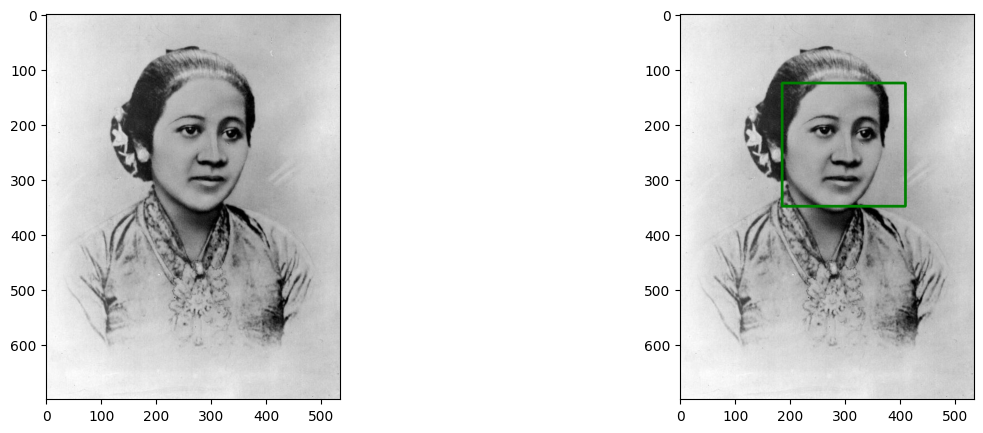

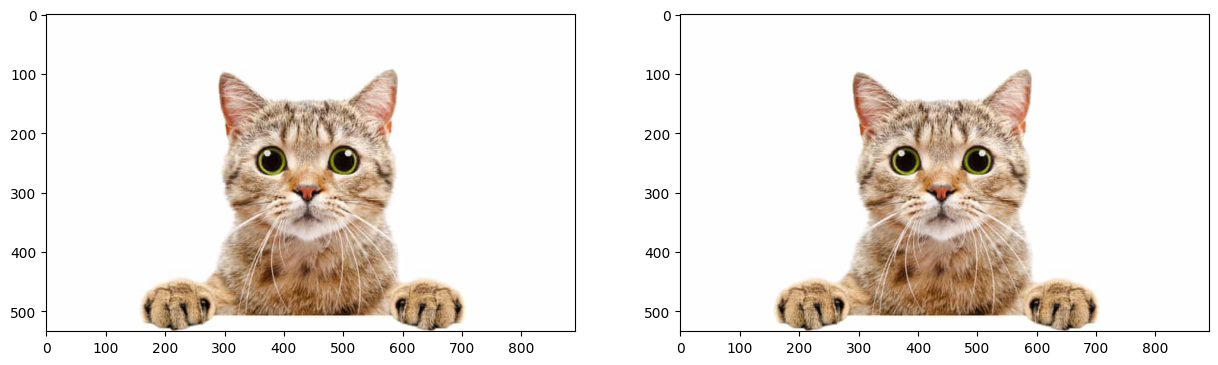

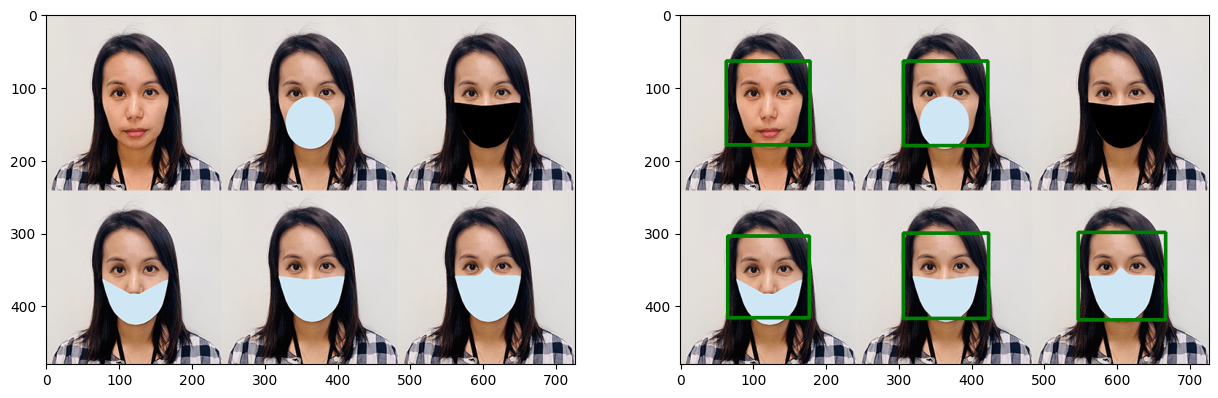

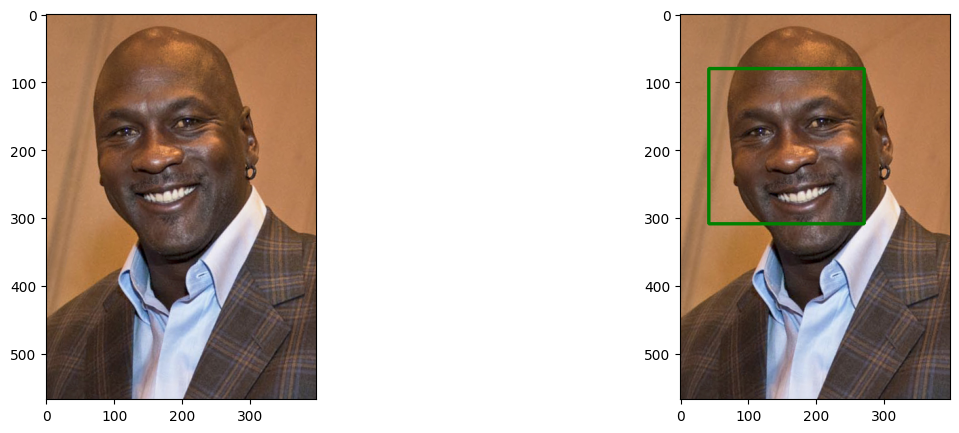

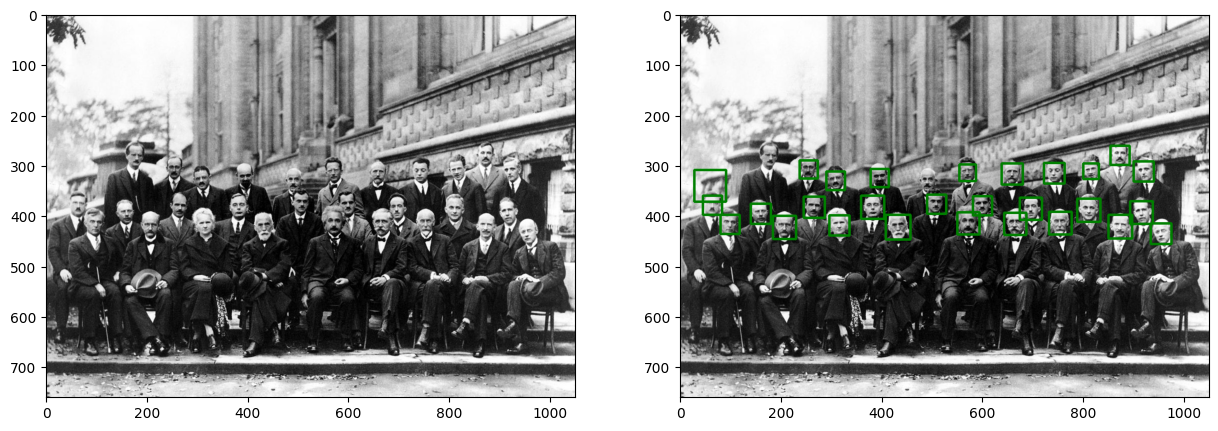

In [3]:
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/face detection/haarcascade_frontalface_alt.xml')
data = ['/content/drive/MyDrive/PCVK/Images/face detection/jokowi.jpg',
        '/content/drive/MyDrive/PCVK/Images/face detection/kartini.jpg',
        '/content/drive/MyDrive/PCVK/Images/face detection/kucing.jpg',
        '/content/drive/MyDrive/PCVK/Images/face detection/mask.png',
        '/content/drive/MyDrive/PCVK/Images/face detection/mjordan.jpg',
        '/content/drive/MyDrive/PCVK/Images/face detection/solvayconf.jpg'
        ]
for i in data:
  image = cv2.imread(i)
  image_ori = cv2.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB))
  axarr[0].imshow(cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axarr[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya seperti gambar berikut. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

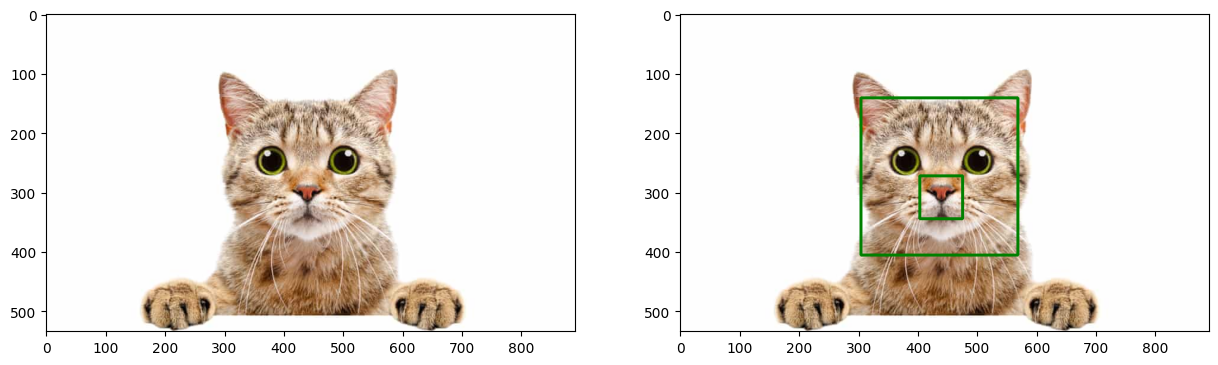

In [4]:
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/face detection/haarcascade_frontalcatface_extended.xml')
data = [
        '/content/drive/MyDrive/PCVK/Images/face detection/kucing.jpg',
        ]
for i in data:
  image = cv2.imread(i)
  image_ori = cv2.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB))
  axarr[0].imshow(cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axarr[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

Cobakan juga untuk eyes detection.

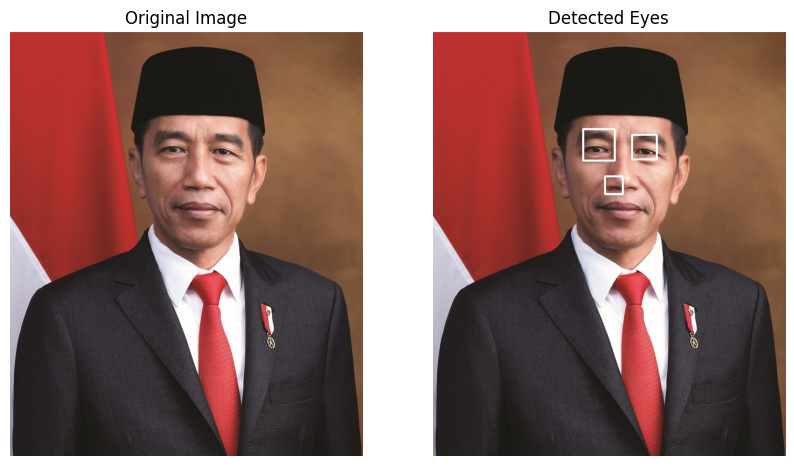

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the eye detection classifiers
cascade_lefteye = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/face detection/haarcascade_righteye_2splits.xml')
cascade_righteye = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/face detection/haarcascade_righteye_2splits.xml')

# Read the input image
jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/face detection/jokowi.jpg')
jokowi_ori = jokowi.copy()
jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)

# Detect eyes
roi_lefteye = cascade_lefteye.detectMultiScale(jokowi_gray)
roi_righteye = cascade_righteye.detectMultiScale(jokowi_gray)

# Draw rectangles around the detected eyes
for (x, y, w, h) in roi_lefteye:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)
for (x, y, w, h) in roi_righteye:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)

# Plot outputs
f, axarr = plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(121), plt.imshow(cv.cvtColor(jokowi_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
plt.title('Detected Eyes'), plt.axis('off')
plt.show()

Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YiWh7QvVH60

In [7]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [8]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [9]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


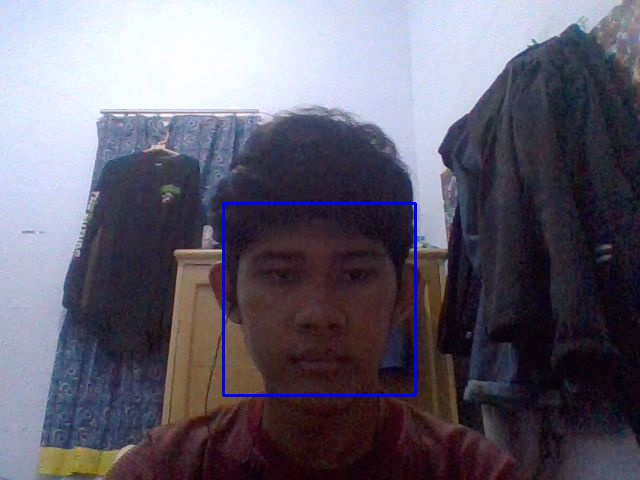

In [13]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya. Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

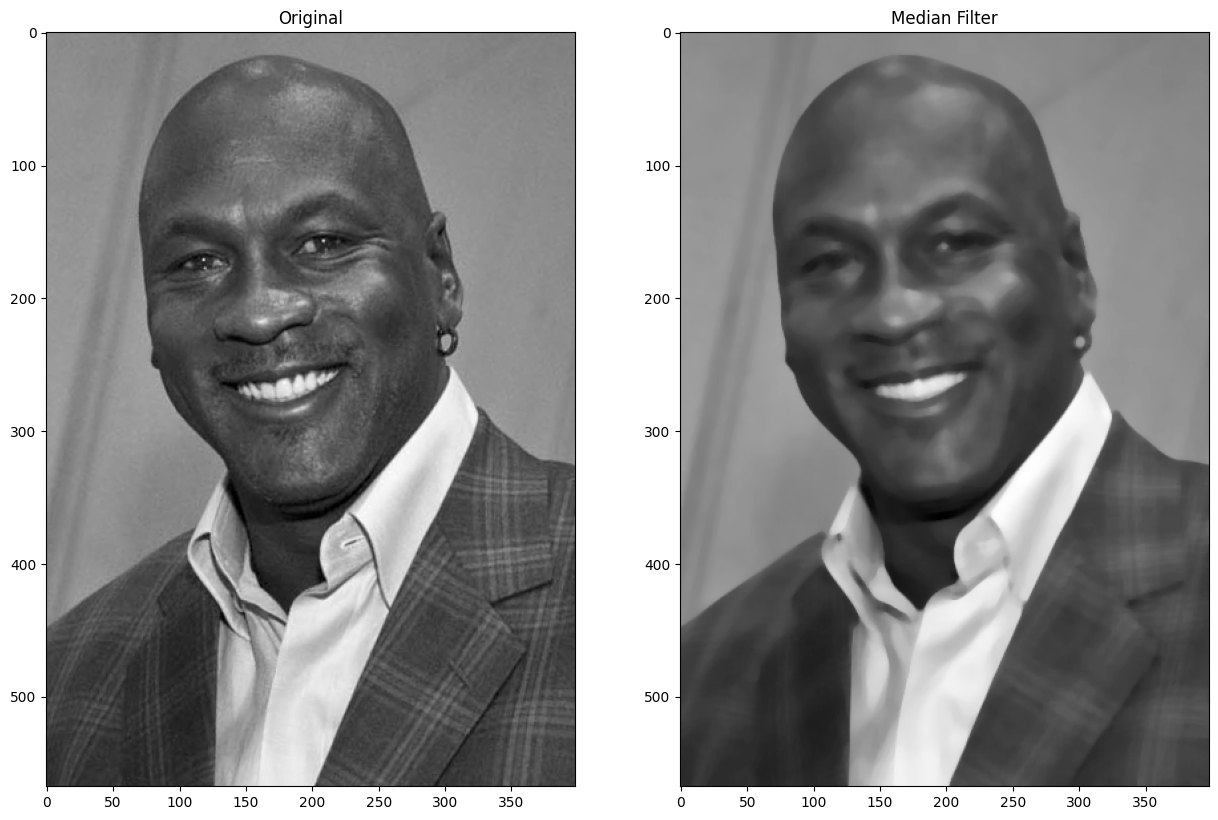

In [14]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/face detection/mjordan.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.medianBlur(image, figure_size)
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.show()

Lakukan segmentasi karakter pada KTP

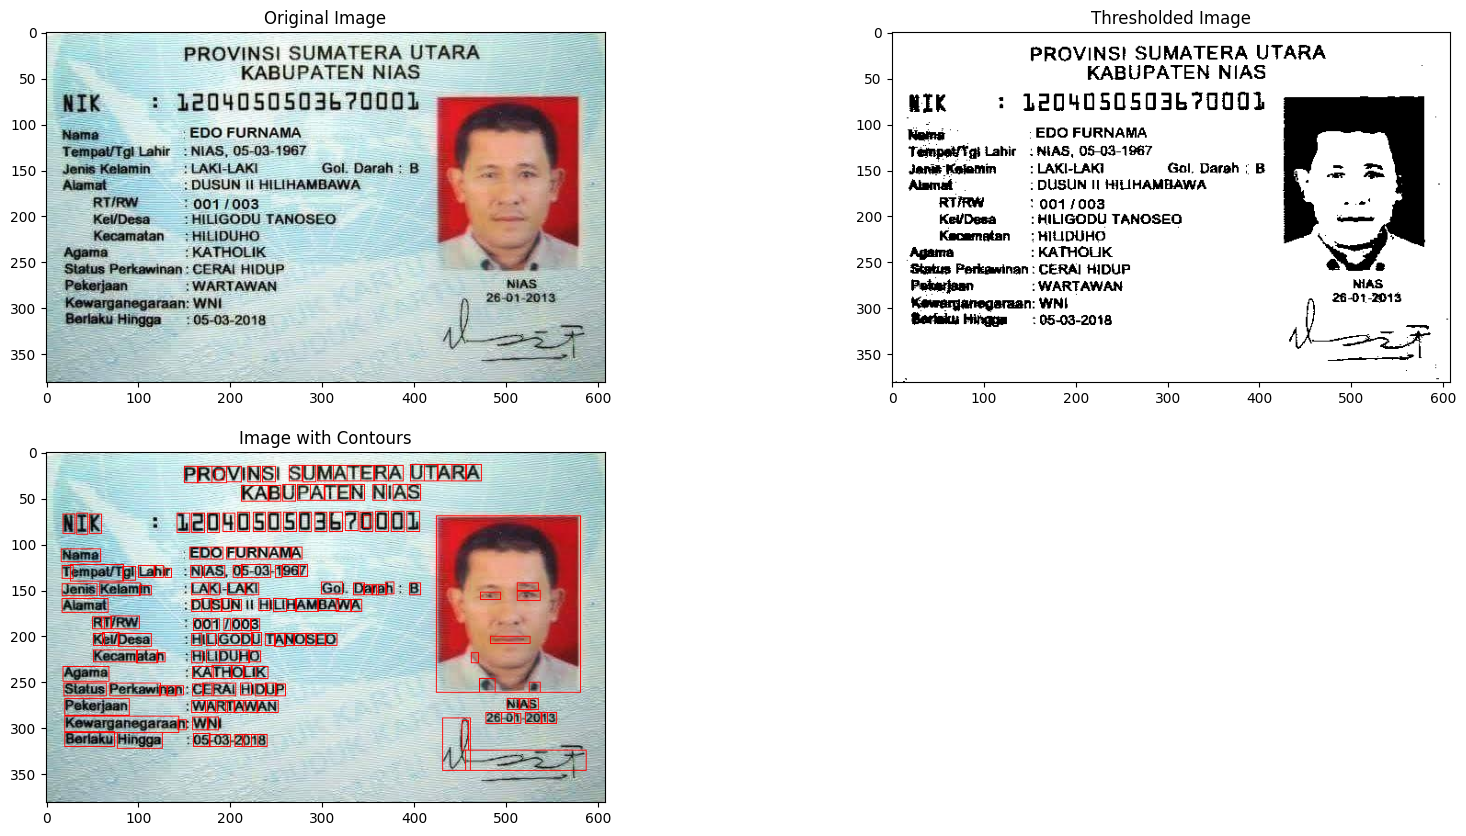

In [22]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

ktp = cv2.imread("/content/drive/MyDrive/PCVK/Images/KTP_More/ktp5.png")

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

# Thresholding to create a binary image
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 7 and float(ras) <= 8:
        cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Create a subplot with 2 rows and 3 columns
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Thresholded Image
plt.subplot(2, 2, 2)
plt.imshow(bw, cmap='gray')
plt.title('Thresholded Image')

# Image with Contours
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')

plt.show()

Lakukan cropping pada bagian NIK saja

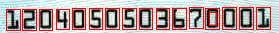

In [26]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

ktp = cv2.imread("/content/drive/MyDrive/PCVK/Images/KTP_More/ktp5.png")

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

# Thresholding to create a binary image
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 7 and float(ras) <= 8:
        cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

crop_image = contour_image[57:90, 136:415]
cv2.imwrite('NIK_crop.jpg', crop_image)
cv2_imshow(crop_image)